In [1]:
%matplotlib widget
# para que funcione el probrama de abajo, asegurarse que se intaló estos dos:
# conda install ipywidgets
#conda install -c conda-forge ipympl
# puede ser necesaario reinicciar VSC

In [ ]:
"""
#raices reales y distintas
A = np.array([[1, -2],
               [-2, -1]])


#raíces reales e iguales
A = np.array([[3, -2],
               [1/2, 1]])

#raíces complejas
A = np.array([[1, -2],
               [1,  -1]])

               """

Valores propios de A: [4.+1.58713096e-08j 4.-1.58713096e-08j]
Vectores propios de A, primer vector:  (0.8944271909999157+0j)   (0.44721359549995787-3.5489327132761447e-09j)
segundo vector:  (0.8944271909999157-0j)   (0.44721359549995787+3.5489327132761447e-09j)


interactive(children=(FloatSlider(value=1.0, description='x', layout=Layout(height='50px', width='1200px'), ma…

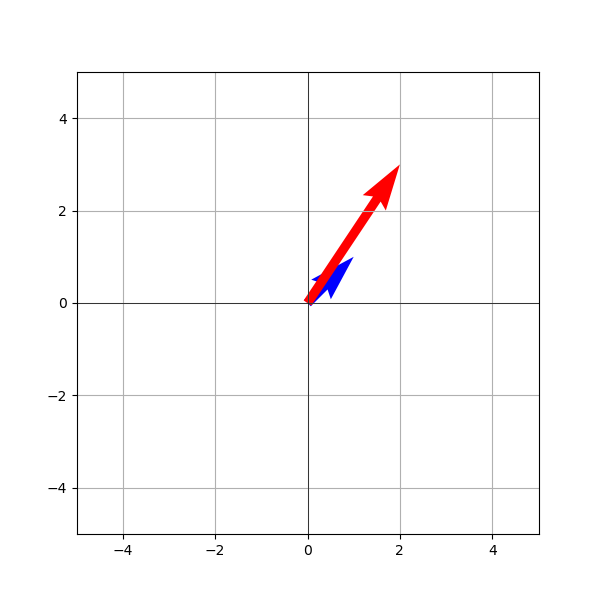

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout

# If you're in Jupyter, make sure to enable an interactive backend:
# %matplotlib widget

# Define transformation matrix
A = np.array([[6, -4],
               [1, 2]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Valores propios de A:", eigenvalues)
print("Vectores propios de A, primer vector: ", eigenvectors[0,0], " ", eigenvectors[1,0])
print("segundo vector: ", eigenvectors[0,1], " ", eigenvectors[1,1])


# Create a new figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid(True)
ax.set_aspect('equal')

# Add coordinate axes
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

# Global quiver objects (initialized to None)
quiver_orig = None
quiver_trans = None

def plot_vectors(x, y):
    global quiver_orig, quiver_trans
    
    # Remove previous vectors if they exist
    if quiver_orig is not None:
        quiver_orig.remove()
    if quiver_trans is not None:
        quiver_trans.remove()
    
    # Original vector
    quiver_orig = ax.quiver(0, 0, x, y, 
                            angles='xy', scale_units='xy', scale=1, 
                            color='blue', width=0.02, label='(x, y)')

    # Transformed vector
    v = A @ np.array([x, y])
    quiver_trans = ax.quiver(0, 0, v[0], v[1],
                             angles='xy', scale_units='xy', scale=1,
                             color='red', width=0.02, label='A(x, y)')
    
    # Trigger an update of the figure
    fig.canvas.draw_idle()

# Create sliders with increased size
x_slider = FloatSlider(
    min=-5, max=5, step=0.01, value=1, description='x',
    layout=Layout(width='1200px', height='50px')  # Larger size
)
y_slider = FloatSlider(
    min=-5, max=5, step=0.01, value=1, description='y',
    layout=Layout(width='1200px', height='50px')  # Larger size
)

# Set up interactive widget
interact(plot_vectors, x=x_slider, y=y_slider)

plt.show()
